In [1]:
 ####### Setup
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox,TextArea
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cv2
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
while os.getcwd().split('\\')[-1] != 'ecological-networks':
    %cd ..
import setup_paths
setup_paths.add_path()
from Species_Reintroductions import *
global DATA_TYPE
DATA_TYPE = 'Real_2D'
CASE_TO_SOLVE_init(DATA_TYPE)
get_CASE()

def CASE_init(CASE_TO_SOLVE):
    DATA_TYPE = CASE_TO_SOLVE
    CASE_TO_SOLVE_init(DATA_TYPE)
    NetworkName_Solved_df = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"Network_Solved_{DATA_TYPE.split('_')[0]}.pkl"))
    M = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"M_{DATA_TYPE.split('_')[0]}.pkl"))
    if DATA_TYPE.split('_')[0] == 'Syn':
        M = {k:M[k] for k in M.keys() if int(k.split('_')[2]) == 100}
    return DATA_TYPE, NetworkName_Solved_df, M

def init_HeatmapData(Case, Start = 0, End = -1):
    if End == -1:
        End = Start + 1
    if Case == 1:
        Heatmap01_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap01_{DATA_TYPE}.pkl"))
        return {k:Heatmap01_All[k][Start:End] for k in Heatmap01_All.keys()}
    if Case == 2:
        Heatmap02_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap02_{DATA_TYPE}.pkl"))
        return {k:Heatmap02_All[k][Start:End] for k in Heatmap02_All.keys()}
    if Case == 3:
        Heatmap03_All = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '02_Generate_Database', f"Heatmap03_{DATA_TYPE}.pkl"))
        return {k:Heatmap03_All[k][Start:End] for k in Heatmap03_All.keys()}

d:\Github\ecological-networks\Code\01_Species_Reintroductions
d:\Github\ecological-networks\Code
d:\Github\ecological-networks
Real_2D


In [2]:
M_Real = UnpickleObj(r"D:\Github\ecological-networks\Code\01_Species_Reintroductions\01_Simulation_Execution\M_Real.pkl")

In [3]:
D = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', 'Updating_Panels', 'strategy_performance_02.pkl'))

In [9]:
# D[NetworkName][s][var][key]

temp_1 = np.array(D['M_PL_041'][1]['Abundance'][0])
temp_2 = np.array(D['M_PL_041'][3]['Abundance'][0])

cnt = 0
temp = []
for i in range(len(temp_1)):
    if temp_1[i] != temp_2[i]:
        cnt += 1
        # print(f"{i}: {temp_1[i]} {temp_2[i]}")
        temp.append([temp_1[i], temp_2[i]])
temp = np.array(temp)

In [10]:
temp.shape

(77, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x17d5b10f2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x17d5b10f8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d5b10f080>],
 'medians': [<matplotlib.lines.Line2D at 0x17d5b10fe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d5b11a198>],
 'means': []}

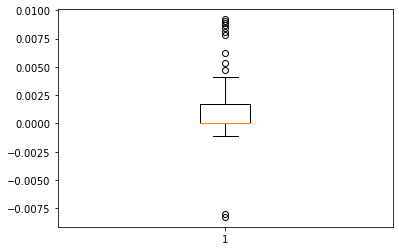

In [15]:
plt.boxplot(temp[:,1]-temp[:,0])

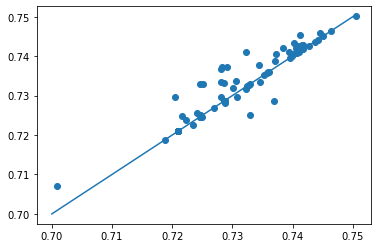

In [13]:
plt.figure()
plt.scatter(temp[:,0],temp[:,1])
plt.plot([0.7,0.75],[0.7,0.75])
plt.show()